In [1]:
'''This script goes along the blog post
"Building powerful image classification models using very little data"
from blog.keras.io.
It uses data that can be downloaded at:
https://www.kaggle.com/c/dogs-vs-cats/data
In our setup, we:
- created a data/ folder
- created train/ and validation/ subfolders inside data/
- created cats/ and dogs/ subfolders inside train/ and validation/
- put the cat pictures index 0-999 in data/train/cats
- put the cat pictures index 1000-1400 in data/validation/cats
- put the dogs pictures index 12500-13499 in data/train/dogs
- put the dog pictures index 13500-13900 in data/validation/dogs
So that we have 1000 training examples for each class, and 400 validation examples for each class.
In summary, this is our directory structure:
```
data/
    train/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
    validation/
        dogs/
            dog001.jpg
            dog002.jpg
            ...
        cats/
            cat001.jpg
            cat002.jpg
            ...
```
'''

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import numpy as np

from sklearn.metrics import classification_report, confusion_matrix


import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()


In [3]:


# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'datacnn/train'
validation_data_dir = 'datacnn/validation'
epochs = 50
batch_size = 16

if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)


In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (5, 5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1000))
model.add(Activation('relu'))

#model.add(Dropout(0.2))
model.add(Dense(100))
model.add(Activation('relu'))

model.add(Dense(4))
model.add(Activation('softmax'))



In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [6]:

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')



# this is the augmentation configuration we will use for testing:
# only rescaling
#test_datagen = ImageDataGenerator(
#    rotation_range=40,
#    width_shift_range=0.2,
#    height_shift_range=0.2,
#    rescale=1./255,
#    shear_range=0.2,
#    zoom_range=0.2,
#    horizontal_flip=True,
#    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    classes=["Cats","Dogs","Rabbits","Bears"],
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    classes=["Cats","Dogs","Rabbits","Bears"],
    class_mode='categorical')

mfit= model.fit_generator(
    train_generator,
    steps_per_epoch= train_generator.samples // batch_size,
    epochs= 25,
    validation_data= validation_generator,
    validation_steps= validation_generator.samples // batch_size
)

model.save_weights('first_try.h5')

Found 422 images belonging to 4 classes.
Found 97 images belonging to 4 classes.


/home/jpphi/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/25
26/26 [==============================] - 25s 872ms/step - loss: 2.8348 - accuracy: 0.2245 - val_loss: 1.3375 - val_accuracy: 0.3333
Epoch 2/25
26/26 [==============================] - 21s 809ms/step - loss: 1.4025 - accuracy: 0.3122 - val_loss: 1.4276 - val_accuracy: 0.3229
Epoch 3/25
26/26 [==============================] - 22s 827ms/step - loss: 1.3638 - accuracy: 0.3650 - val_loss: 1.2839 - val_accuracy: 0.4271
Epoch 4/25
26/26 [==============================] - 23s 859ms/step - loss: 1.3755 - accuracy: 0.3671 - val_loss: 1.2419 - val_accuracy: 0.4271
Epoch 5/25
26/26 [==============================] - 23s 873ms/step - loss: 1.2417 - accuracy: 0.4197 - val_loss: 1.1225 - val_accuracy: 0.4688
Epoch 6/25
26/26 [==============================] - 23s 873ms/step - loss: 1.2818 - accuracy: 0.4152 - val_loss: 1.0552 - val_accuracy: 0.5833
Epoch 7/25
26/26 [==============================] - 23s 893ms/step - loss: 1.2052 - accuracy: 0.4330 - val_loss: 2.5555 - val_accuracy: 0.3854

In [7]:
#X_train, y_train = next(train_generator)
#X_test, y_test = next(validation_generator)

In [8]:

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator)#, nb_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names =["Cats","Dogs","Rabbits","Bears"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/home/jpphi/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[ 8 15  2  7]
 [18  8  2  4]
 [ 8  2  2  1]
 [ 6  6  1  7]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.20      0.25      0.22        32
        Dogs       0.26      0.25      0.25        32
     Rabbits       0.29      0.15      0.20        13
       Bears       0.37      0.35      0.36        20

    accuracy                           0.26        97
   macro avg       0.28      0.25      0.26        97
weighted avg       0.27      0.26      0.26        97



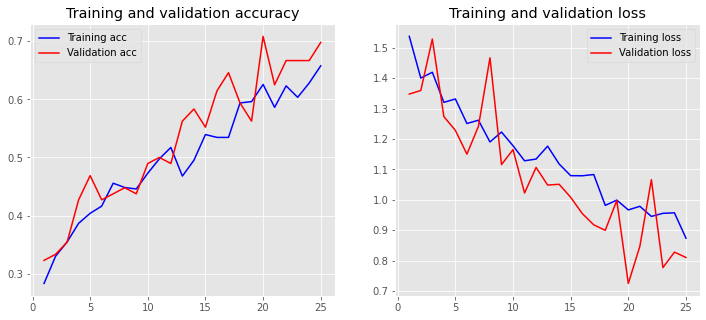

In [9]:
plot_history(mfit)

In [12]:
print(mfit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [13]:
l_classe= list(validation_generator.class_indices)
l_classe

['Cats', 'Dogs', 'Rabbits', 'Bears']

/home/jpphi/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


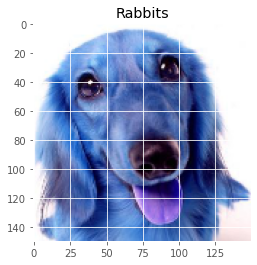

In [14]:
import keras
from keras.models import load_model
from keras.models import Sequential
import cv2
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img


img = cv2.imread('./datacnn/train/Dogs/dog000012a.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
#classes = model.predict_classes(img2)
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

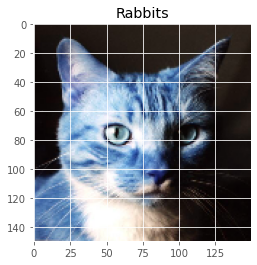

In [15]:
img = cv2.imread('./datacnn/train/Cats/cat000852.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

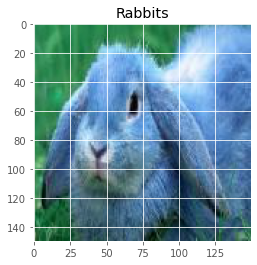

In [16]:
img = cv2.imread('./datacnn/train/Rabbits/rabbitfrontalfrontal0001.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

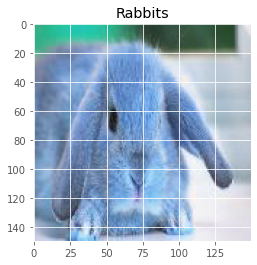

In [17]:
img = cv2.imread('./datacnn/train/Rabbits/rabbitfrontalfrontal0002.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

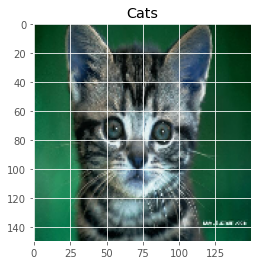

In [18]:
img = cv2.imread('./datacnn/train/Cats/cat000908.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

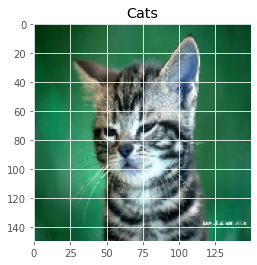

In [19]:
img = cv2.imread('./datacnn/train/Cats/cat000929.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

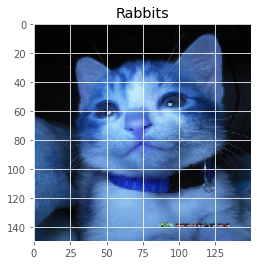

In [20]:
img = cv2.imread('./datacnn/train/Cats/cat000960.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

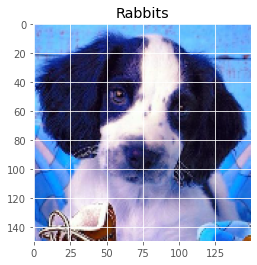

In [21]:
img = cv2.imread('./datacnn/train/Dogs/dog000013a.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

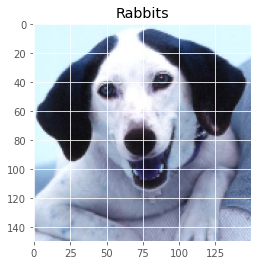

In [22]:
img = cv2.imread('./datacnn/train/Dogs/dog000014a.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

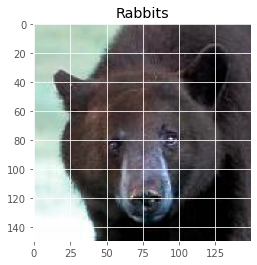

In [23]:
img = cv2.imread('./datacnn/train/Bears/bearfrontal0001.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

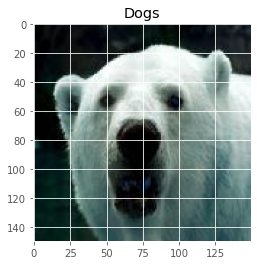

In [24]:
img = cv2.imread('./datacnn/train/Bears/bearfrontal0002.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

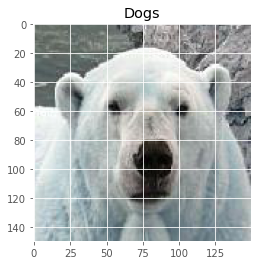

In [25]:
img = cv2.imread('./datacnn/train/Bears/bearfrontal0003.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

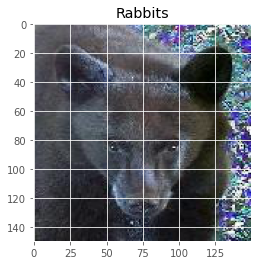

In [26]:
img = cv2.imread('./datacnn/train/Bears/bearfrontal0004.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

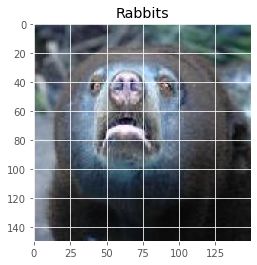

In [27]:
img = cv2.imread('./datacnn/train/Bears/bearfrontal0006.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

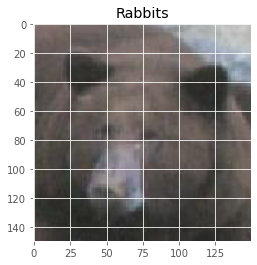

In [28]:
img = cv2.imread('./datacnn/train/Bears/bearfrontal0007.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

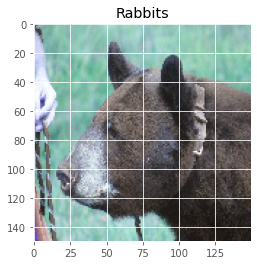

In [29]:
img = cv2.imread('./datacnn/test/Bears/bearheadgoogle001.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

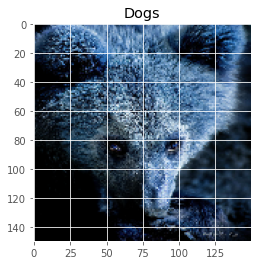

In [30]:
img = cv2.imread('./datacnn/test/Bears/bearheadgoogle002.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

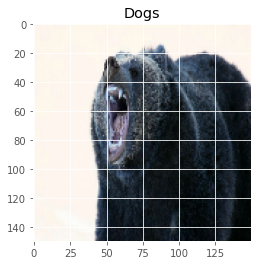

In [31]:
img = cv2.imread('./datacnn/test/Bears/bearheadgoogle003.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

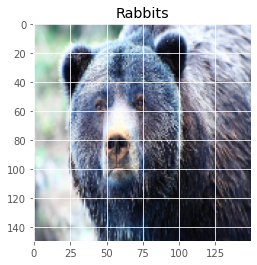

In [32]:
img = cv2.imread('./datacnn/test/Bears/bearheadgoogle004.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

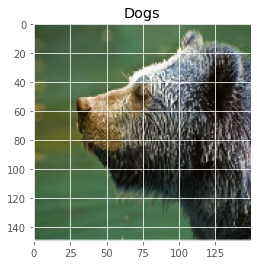

In [33]:
img = cv2.imread('./datacnn/test/Bears/bearheadgoogle005.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

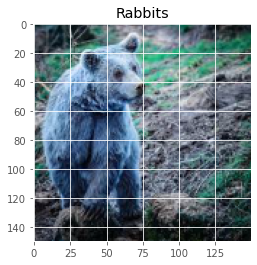

In [34]:
img = cv2.imread('./datacnn/test/Bears/bearheadgoogle006.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

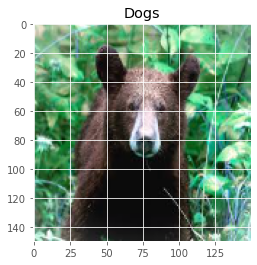

In [35]:
img = cv2.imread('./datacnn/test/Bears/bearheadgoogle007.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

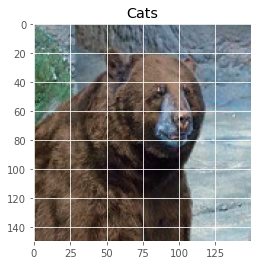

In [36]:
img = cv2.imread('./datacnn/test/Bears/bearheadgoogle008.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

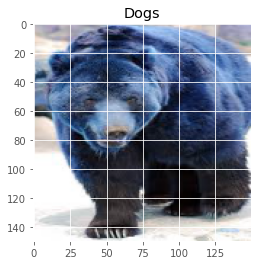

In [37]:
img = cv2.imread('./datacnn/test/Bears/bearheadgoogle009.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

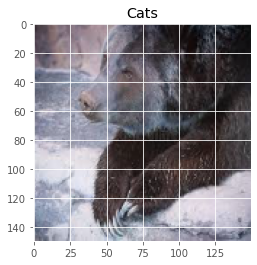

In [38]:
img = cv2.imread('./datacnn/test/Bears/bearheadgoogle010.jpg')
img = cv2.resize(img,(150,150))
img2 = np.reshape(img,[1,150,150,3])
classes = model.predict_classes(img2)

plt.title(l_classe[classes[0]])
plt.imshow(img)

## Gridsearch

In [1]:
import keras
from keras.models import load_model
from keras.models import Sequential
import cv2
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [25]:
def create_model(optimizer= 'Adam', num_filters= 16,num_filters1= 32, num_filters2= 64, kernel_size= (2,2), pool1= (2,2)):
    model = Sequential()
#    model.add(Conv2D(num_filters= num_filters, kernel_size= kernel_size, input_shape=(150, 150, 3)))
    model.add(Conv2D(filters= num_filters, kernel_size= kernel_size, input_shape=(150, 150, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size= pool1))
#    model.add(Conv2D(num_filters= num_filters1,  kernel_size= kernel_size))
    model.add(Conv2D(filters= num_filters1, kernel_size= kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
#    model.add(Conv2D(num_filters= num_filters1,  kernel_size= kernel_size))
    model.add(Conv2D(filters= num_filters2, kernel_size= kernel_size))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(64))
    model.add(Activation('relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(4))
    model.add(Activation('softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer= optimizer,
    metrics=['accuracy'])
    return model

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [27]:
batch_size= 32
train_data_dir = 'datacnn/train'
validation_data_dir = 'datacnn/validation'
img_width, img_height= 150, 150

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    classes=["Cats","Dogs","Rabbits","Bears"],
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    classes=["Cats","Dogs","Rabbits","Bears"],
    class_mode='categorical')

"""
train_generator = train_datagen.flow_from_directory(
'drive/MyDrive/sample_data/train', # this is the target directory
classes = ["Cats","Dogs","Rabbits","Bears"],
target_size=(150, 150), # all images will be resized to 150x150
batch_size=batch_size)
#,class_mode='binary')
"""

Found 428 images belonging to 4 classes.
Found 91 images belonging to 4 classes.


'\ntrain_generator = train_datagen.flow_from_directory(\n\'drive/MyDrive/sample_data/train\', # this is the target directory\nclasses = ["Cats","Dogs","Rabbits","Bears"],\ntarget_size=(150, 150), # all images will be resized to 150x150\nbatch_size=batch_size)\n#,class_mode=\'binary\')\n'

In [28]:
"""
# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
'drive/MyDrive/sample_data/validation',
classes = ["cats","dogs","rabbits"],
target_size=(150, 150),
batch_size=batch_size)
#,class_mode='binary')
"""

'\n# this is a similar generator, for validation data\nvalidation_generator = test_datagen.flow_from_directory(\n\'drive/MyDrive/sample_data/validation\',\nclasses = ["cats","dogs","rabbits"],\ntarget_size=(150, 150),\nbatch_size=batch_size)\n#,class_mode=\'binary\')\n'

In [29]:
train_generator.class_indices
validation_generator.class_indices

{'Cats': 0, 'Dogs': 1, 'Rabbits': 2, 'Bears': 3}

In [30]:
X_train, y_train = next(iter(train_generator))
X_test, y_test = next(iter(validation_generator))


In [31]:
print(X_train.shape)
print(y_train.shape)


(32, 150, 150, 3)
(32, 4)


In [32]:
param_grid = dict(num_filters=[8,16],
                  num_filters1= [16,32,64], 
                  num_filters2= [32,64,128], 
                  kernel_size=[(3, 3),(4,4),(5,5)],
                  pool1= [(2,2),(3,3),(4,4)]
                  #activation =['softmax', ''],
                  #loss = ['categorical_crossentropy', ''],
                  
                 )

In [19]:
import numpy as np

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

epochs = 15



model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=100,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)




#model = KerasClassifier(build_fn=create_model,
#                        epochs=epochs,
#                        batch_size=100,
#                        verbose=True)
#
#grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,cv=4, verbose=1, n_iter=4) 
##grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
#
#grid_result = grid.fit(X_train, y_train)
#



Fitting 4 folds for each of 5 candidates, totalling 20 fits


In [20]:
# Evaluate testing set
test_accuracy = grid.score(X_test,y_test)
print('accuracy_test = ',test_accuracy)

print('best socre = ', grid_result.best_score_)
print('best param = ',grid_result.best_params_)

accuracy_test =  0.25
best socre =  0.375
best param =  {'pool1': (3, 3), 'num_filters2': 64, 'num_filters1': 16, 'num_filters': 16, 'kernel_size': (5, 5)}


In [45]:
model1 = create_model(optimizer= 'Adam', num_filters1= 64, num_filters= 32, kernel_size = (3, 3))


In [46]:


# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    classes= ["Cats","Dogs","Rabbits","Bears"],
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    classes= ["Cats","Dogs","Rabbits","Bears"],
    class_mode='categorical')



mfit= model1.fit_generator(
    train_generator,
    #steps_per_epoch=nb_train_samples // batch_size,
    epochs= 15,
    validation_data=validation_generator,
    #validation_steps=nb_validation_samples // batch_size
)



Found 422 images belonging to 4 classes.
Found 97 images belonging to 4 classes.


/home/jpphi/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
14/14 [==============================] - 14s 951ms/step - loss: 1.4287 - accuracy: 0.3714 - val_loss: 1.3125 - val_accuracy: 0.3299
Epoch 2/15
14/14 [==============================] - 13s 925ms/step - loss: 1.3057 - accuracy: 0.3545 - val_loss: 1.2755 - val_accuracy: 0.4536
Epoch 3/15
14/14 [==============================] - 14s 1s/step - loss: 1.2098 - accuracy: 0.4999 - val_loss: 1.1154 - val_accuracy: 0.4742
Epoch 4/15
14/14 [==============================] - 14s 980ms/step - loss: 0.9143 - accuracy: 0.6473 - val_loss: 1.1047 - val_accuracy: 0.4948
Epoch 5/15
14/14 [==============================] - 13s 869ms/step - loss: 0.7923 - accuracy: 0.6917 - val_loss: 0.9377 - val_accuracy: 0.5876
Epoch 6/15
14/14 [==============================] - 13s 866ms/step - loss: 0.6749 - accuracy: 0.7577 - val_loss: 0.8723 - val_accuracy: 0.6392
Epoch 7/15
14/14 [==============================] - 12s 843ms/step - loss: 0.6230 - accuracy: 0.7529 - val_loss: 0.8383 - val_accuracy: 0.6186
Ep

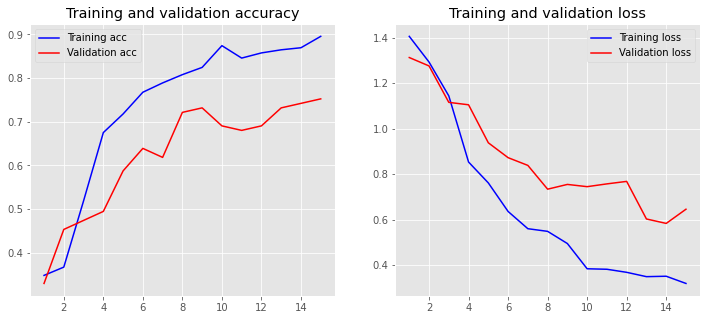

In [47]:
plot_history(mfit)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

#Confution Matrix and Classification Report
Y_pred = model1.predict_generator(validation_generator)#, nb_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names =["Cats","Dogs","Rabbits","Bears"]
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/home/jpphi/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[12 15  1  4]
 [15 12  1  4]
 [ 4  7  1  1]
 [ 6  5  2  7]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.32      0.38      0.35        32
        Dogs       0.31      0.38      0.34        32
     Rabbits       0.20      0.08      0.11        13
       Bears       0.44      0.35      0.39        20

    accuracy                           0.33        97
   macro avg       0.32      0.29      0.30        97
weighted avg       0.33      0.33      0.32        97



In [ ]:
# Gridsearch II

In [ ]:
import keras
from keras.models import load_model
from keras.models import Sequential

import cv2
import numpy as np 

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import matplotlib.pyplot as plt

plt.style.use('ggplot')

def create_model(optimizer= 'Adam', num_filters= 16,num_filters1= 32, num_filters2= 64, kernel_size= (2,2), pool1= (2,2)):

    model = Sequential()

#    model.add(Conv2D(num_filters= num_filters, kernel_size= kernel_size, input_shape=(150, 150, 3)))

    model.add(Conv2D(filters= num_filters, kernel_size= kernel_size, input_shape=(150, 150, 3)))

    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size= pool1))

#    model.add(Conv2D(num_filters= num_filters1,  kernel_size= kernel_size))

    model.add(Conv2D(filters= num_filters1, kernel_size= kernel_size))

    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

#    model.add(Conv2D(num_filters= num_filters1,  kernel_size= kernel_size))

    model.add(Conv2D(filters= num_filters2, kernel_size= kernel_size))

    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten()) # this converts our 3D feature maps to 1D feature vectors

    model.add(Dense(64))

    model.add(Activation('relu'))

    #model.add(Dropout(0.5))

    model.add(Dense(4))

    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',

                  optimizer= optimizer,

    metrics=['accuracy'])

    return model



In [ ]:
train_datagen = ImageDataGenerator(

    rescale=1. / 255,

    shear_range=0.2,

    zoom_range=0.2,

    horizontal_flip=True)


batch_size= 32

train_data_dir = 'datacnn/train'

validation_data_dir = 'datacnn/validation'

img_width, img_height= 150, 150


test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(

    train_data_dir,

    target_size=(img_width, img_height),

    batch_size=batch_size,

    classes=["Cats","Dogs","Rabbits","Bears"],

    class_mode='categorical')


In [ ]:
validation_generator = test_datagen.flow_from_directory(

    validation_data_dir,

    target_size=(img_width, img_height),

    batch_size=batch_size,

    classes=["Cats","Dogs","Rabbits","Bears"],

    class_mode='categorical')

train_generator.class_indices

validation_generator.class_indices

X_train, y_train = next(iter(train_generator))

X_test, y_test = next(iter(validation_generator))
print(X_train.shape)

print(y_train.shape)

param_grid = dict(num_filters=[8,16],

                  num_filters1= [16,32,64], 

                  num_filters2= [32,64,128], 

                  kernel_size=[(3, 3),(4,4),(5,5)],

                  pool1= [(2,2),(3,3),(4,4)]

                  #activation =['softmax', ''],

                  #loss = ['categorical_crossentropy', ''],

                  

                 )

import numpy as np


from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import GridSearchCV

epochs = 15

model = KerasClassifier(build_fn=create_model,

                            epochs=epochs, batch_size=100,

                            verbose=False)

grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,

                          cv=4, verbose=1, n_iter=5)

grid_result = grid.fit(X_train, y_train)

#model = KerasClassifier(build_fn=create_model,

#                        epochs=epochs,

#                        batch_size=100,

#                        verbose=True)

#

#grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,cv=4, verbose=1, n_iter=4) 

##grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)

#

#grid_result = grid.fit(X_train, y_train)

#
del.make_test_function.<locals>.test_function at 0x7f78bce69790> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has experimental_relax_shapes=True option that relaxes argument shapes that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.

# Evaluate testing set

test_accuracy = grid.score(X_test,y_test)

print('accuracy_test = ',test_accuracy)


print('best socre = ', grid_result.best_score_)




model1 = create_model(optimizer= 'Adam', num_filters1= 64, num_filters= 32, kernel_size = (3, 3))


# this is the augmentation configuration we will use for training

train_datagen = ImageDataGenerator(

    rescale=1. / 255,

    shear_range=0.2,

    zoom_range=0.2,

    horizontal_flip=True)



# this is the augmentation configuration we will use for testing:

# only rescaling

test_datagen = ImageDataGenerator(rescale=1. / 255)

​

train_generator = train_datagen.flow_from_directory(

    train_data_dir,

    target_size=(img_width, img_height),

    batch_size=batch_size,

    classes= ["Cats","Dogs","Rabbits","Bears"],

    class_mode='categorical')

​

validation_generator = test_datagen.flow_from_directory(

    validation_data_dir,

    target_size=(img_width, img_height),

    batch_size=batch_size,

    classes= ["Cats","Dogs","Rabbits","Bears"],

    class_mode='categorical')

​

​

​

mfit= model1.fit_generator(

    train_generator,

    #steps_per_epoch=nb_train_samples // batch_size,

    epochs= 15,

    validation_data=validation_generator,

    #validation_steps=nb_validation_samples // batch_size

)



plot_history(mfit)

from sklearn.metrics import classification_report, confusion_matrix

​

#Confution Matrix and Classification Report

Y_pred = model1.predict_generator(validation_generator)#, nb_samples // batch_size+1)

y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')

print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')

target_names =["Cats","Dogs","Rabbits","Bears"]

print(classification_report(validation_generator.classes, y_pred, target_names=target_names))
